In [30]:
import requests
import matplotlib.pyplot as plt
import tqdm.auto as tqdm
import time

In [206]:
emoji_set = set()
l = []

  0%|          | 0/2000 [00:00<?, ?it/s]

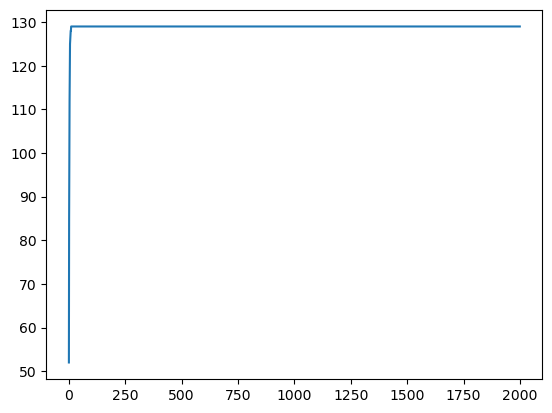

In [207]:
for _ in tqdm.trange(2000):
    res = requests.get("https://prob14.geekgame.pku.edu.cn/level2")
    for emoji in res.content.decode()[257:257 + 64]:
        emoji_set.add(emoji)
    l.append(len(emoji_set))
    time.sleep(0.1)
plt.plot(l)

In [40]:
emojis = list(emoji_set)

In [142]:
print("".join(emojis[:64]))
print("".join(emojis[64:]))

👠🐲🐐👡🐓🐭👚👴🐖💋🐴🐱👆💌👺💉💊👦👧👿🐫🐣👑👸🐥👖👶👔💀🐗🐵👙👗💎🐡👞👅👬🐺👽👕👘💇👤👍👐👥💁🐙👫👄🐬🐦🐟🐹💏🐑💂👢🐠🐶👭🐞🐘
👝🐚🐛🐷👮👌🐿🐩👷👛🐸👹👜👪👇🐨👱👟💅👾👉💃👼🐢👩👋👂🐽👣👰💈👈👲👒💍👻🐪🐤🐯💄🐾👵👨🐒🐕🐰👁👊🐜💆👃🐝👳🐻👏🐔👎🐧🐮👓👀👯🐳🐼


In [78]:
ans = ["🟨"] * 64
red = "🟥"
green = "🟩"

In [88]:
session = requests.Session()
res1 = session.get(f"https://prob14.geekgame.pku.edu.cn/level1?guess={''.join(emojis[:64])}")
res2 = session.get(f"https://prob14.geekgame.pku.edu.cn/level1?guess={''.join(emojis[64:])}")
content1 = res1.content.decode()
content2 = res2.content.decode()
l = content1.find("push") + 6
mask = content1[l: l + 64] + content2[l: l + 64]

In [86]:
for idx, status in enumerate(mask):
    if status != red:
        trial = session.get(f"https://prob14.geekgame.pku.edu.cn/level1?guess={''.join(emojis[idx] for _ in range(64))}")
        l = content1.find("push") + 6
        assert l == 516, f"expect l to be 516, found {l}!"
        for idx2, trial_status in enumerate(trial.content.decode()[l: l + 64]):
            if trial_status == green:
                ans[idx2] = emojis[idx]
        print(trial.content.decode()[l: l + 64])
        print("".join(ans))

🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟩🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟩🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟩🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸👴👿👙👵💆👩👽👛👓👦👝👢💃💅👶👅💈👈💅👼👁👃💂👆👄👂👳👲👢💆👤👜👆👺👱👺👛👆👡
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
💈💅👼💁👦👗💊💊👱👇👔💆👺👦👓👳👔👉👞💄👧👘💃👺👸

In [144]:
sessions = [ requests.Session() for _ in range(8) ]
for session in sessions:
    res = session.get(f"https://prob14.geekgame.pku.edu.cn/level3?guess={emojis[0] * 64}")
    content = res.content.decode()
    l = content.find("push") + 6
    print(content[l: l + 64])

🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟩🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟩🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨


In [172]:
import pickle
s = sessions[1]
for k, v in s.cookies.get_dict().items():
    print(k, v)

PLAY_SESSION eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiNCIsInRhcmdldCI6Ilx1RDgzRFx1REM1MVx1RDgzRFx1REM2M1x1RDgzRFx1REM1Qlx1RDgzRFx1REM3RVx1RDgzRFx1REM3NFx1RDgzRFx1REM4Nlx1RDgzRFx1REM4N1x1RDgzRFx1REM4NVx1RDgzRFx1REM2M1x1RDgzRFx1REM0Mlx1RDgzRFx1REM0N1x1RDgzRFx1REMzRlx1RDgzRFx1REM3M1x1RDgzRFx1REM4NVx1RDgzRFx1REM1RFx1RDgzRFx1REM3RVx1RDgzRFx1REM2MFx1RDgzRFx1REM3Rlx1RDgzRFx1REM1MVx1RDgzRFx1REM1NVx1RDgzRFx1REM4NFx1RDgzRFx1REM2MFx1RDgzRFx1REM4NFx1RDgzRFx1REM4N1x1RDgzRFx1REM2NVx1RDgzRFx1REM2MVx1RDgzRFx1REM2MFx1RDgzRFx1REM1OVx1RDgzRFx1REM1OVx1RDgzRFx1REM1N1x1RDgzRFx1REM4M1x1RDgzRFx1REM3Q1x1RDgzRFx1REM0M1x1RDgzRFx1REM0Mlx1RDgzRFx1REM3RFx1RDgzRFx1REMzRlx1RDgzRFx1REM0OFx1RDgzRFx1REMzQlx1RDgzRFx1REM3OFx1RDgzRFx1REM4NFx1RDgzRFx1REM4OFx1RDgzRFx1REM3Qlx1RDgzRFx1REM0M1x1RDgzRFx1REM0Mlx1RDgzRFx1REM0Nlx1RDgzRFx1REM3M1x1RDgzRFx1REM3Nlx1RDgzRFx1REM3RVx1RDgzRFx1REM2MFx1RDgzRFx1REM1RFx1RDgzRFx1REM3RFx1RDgzRFx1REM4N1x1RDgzRFx1REM1NVx1RDgzRFx1REM2NVx1RDgzRFx1REM1NVx1RDgzRFx1RE

In [220]:
lv3sess = requests.Session()
lv3sess.get(f"https://prob14.geekgame.pku.edu.cn/level3?guess={emojis[0] * 64}")
new_s = requests.Session()
for k, v in lv3sess.cookies.get_dict().items():
    new_s.cookies[k] = v

In [227]:
for _ in range(16):
    trial = new_s.get(f"https://prob14.geekgame.pku.edu.cn/level3?guess={''.join(emojis[6] for _ in range(64))}")
    l = content1.find("push") + 6
    # assert l == 516, f"expect l to be 516, found {l}!"
    for idx2, trial_status in enumerate(trial.content.decode()[l: l + 64]):
        if trial_status == green:
            ans[idx2] = emoji
    l2 = trial.content.decode().find("remaining")
    print(trial.content.decode()[l2: l2 + 12])
    print(trial.content.decode()[l: l + 64])

remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨

In [228]:
ans = ["🟨"] * 64
for emoji in emojis:
    trial = new_s.get(f"https://prob14.geekgame.pku.edu.cn/level3?guess={''.join(emoji for _ in range(64))}")
    l = content1.find("push") + 6
    # assert l == 516, f"expect l to be 516, found {l}!"
    for idx2, trial_status in enumerate(trial.content.decode()[l: l + 64]):
        if trial_status == green:
            ans[idx2] = emoji
    l2 = trial.content.decode().find("remaining")
    print(trial.content.decode()[l2: l2 + 12])
    print(trial.content.decode()[l: l + 64])
    print("".join(ans))
trial = new_s.get(f"https://prob14.geekgame.pku.edu.cn/level3?guess={''.join(ans)}")
print(trial.content.decode())

remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
remaining: 1
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨👚🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨

In [128]:
session = requests.Session()
for i in range(8):
    res1 = session.get(f"https://prob14.geekgame.pku.edu.cn/level2?guess={emojis[i] * 64}")
    content1 = res1.content.decode()
    l = content1.find("push") + 6
    print(content1[l: l + 64])
print(session.cookies)

🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
<RequestsCookieJar[<Cookie PLAY_SESSION=eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiMCIsInRhcmdldCI6Ilx1RDgzRFx1REM2MFx1RDgzRFx1REM4NVx1RDgzRFx1REM3OVx1RDgzRFx1REM4MFx1RDgzRFx1REM4QVx1RDgzRFx1REMzQlx1RDgzRFx1REM3Nlx1RDgzRFx1REMzQlx1RDgzRFx1REM4OVx1RDgzRFx1REM3NFx1RDgzRFx1REM0OFx1RDgzRFx1REM4NFx1RDgzRFx1REM2NFx1RDgzRFx1REM0OFx1RDgzRFx1REM0M1x1RDgzRFx1REM1M1x1RDgzRFx1REM1NFx1RDgzRFx1REM3OFx1RDgzRFx1REM3QVx1RDgzRFx1REM0OVx1RDgzRFx1REM1N1x1RDgzRFx

In [133]:
session = requests.Session()
for i in range(8):
    res1 = session.get(f"https://prob14.geekgame.pku.edu.cn/level2?guess={emojis[i] * 64}")
    content1 = res1.content.decode()
    l = content1.find("push") + 6
    print(content1[l: l + 64])
print(session.cookies)

🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟨🟨🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨
<RequestsCookieJar[<Cookie PLAY_SESSION=eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiMCIsInRhcmdldCI6Ilx1RDgzRFx1REM3Q1x1RDgzRFx1REM1NFx1RDgzRFx1REM4MVx1RDgzRFx1REM3NVx1RDgzRFx1REM4OVx1RDgzRFx1REM3RVx1RDgzRFx1REM1RFx1RDgzRFx1REM2OVx1RDgzRFx1REM4N1x1RDgzRFx1REM0NFx1RDgzRFx1REM3OFx1RDgzRFx1REM4OFx1RDgzRFx1REM0NFx1RDgzRFx1REM4Mlx1RDgzRFx1REM3NVx1RDgzRFx1REM4Nlx1RDgzRFx1REM3M1x1RDgzRFx1REM3NFx1RDgzRFx1REM0NFx1RDgzRFx1REM4OFx1RDgzRFx1REM3NFx1RDgzRFx

In [130]:
s1 = "eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiMCIsInRhcmdldCI6Ilx1RDgzRFx1REM2MFx1RDgzRFx1REM4NVx1RDgzRFx1REM3OVx1RDgzRFx1REM4MFx1RDgzRFx1REM4QVx1RDgzRFx1REMzQlx1RDgzRFx1REM3Nlx1RDgzRFx1REMzQlx1RDgzRFx1REM4OVx1RDgzRFx1REM3NFx1RDgzRFx1REM0OFx1RDgzRFx1REM4NFx1RDgzRFx1REM2NFx1RDgzRFx1REM0OFx1RDgzRFx1REM0M1x1RDgzRFx1REM1M1x1RDgzRFx1REM1NFx1RDgzRFx1REM3OFx1RDgzRFx1REM3QVx1RDgzRFx1REM0OVx1RDgzRFx1REM1N1x1RDgzRFx1REM0NFx1RDgzRFx1REM4OVx1RDgzRFx1REM2M1x1RDgzRFx1REM1NFx1RDgzRFx1REM2M1x1RDgzRFx1REM2Mlx1RDgzRFx1REM2NFx1RDgzRFx1REM3OFx1RDgzRFx1REM3NFx1RDgzRFx1REM3N1x1RDgzRFx1REM1Mlx1RDgzRFx1REM1QVx1RDgzRFx1REM0Nlx1RDgzRFx1REM1Rlx1RDgzRFx1REM2NFx1RDgzRFx1REM4MFx1RDgzRFx1REM1NFx1RDgzRFx1REM4NFx1RDgzRFx1REM0Mlx1RDgzRFx1REM2Mlx1RDgzRFx1REM2OFx1RDgzRFx1REM2MVx1RDgzRFx1REM1RFx1RDgzRFx1REM3QVx1RDgzRFx1REM1Qlx1RDgzRFx1REM4N1x1RDgzRFx1REM1NVx1RDgzRFx1REM0N1x1RDgzRFx1REM1RFx1RDgzRFx1REM2Mlx1RDgzRFx1REM1N1x1RDgzRFx1REM3OVx1RDgzRFx1REMzRlx1RDgzRFx1REM2OFx1RDgzRFx1REM3NVx1RDgzRFx1REM4OFx1RDgzRFx1REM4QVx1RDgzRFx1REM2MVx1RDgzRFx1REM2M1x1RDgzRFx1REM1QVx1RDgzRFx1REM4OVx1RDgzRFx1REM1OVx1RDgzRFx1REM2MiJ9LCJuYmYiOjE2OTcyNjQ1NDEsImlhdCI6MTY5NzI2NDU0MX0.wKqeA8H5YJLp9TSriYV1j5qJlxikp-B3YxAbqJOxC6M"
s2 = "eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiMCIsInRhcmdldCI6Ilx1RDgzRFx1REM2MFx1RDgzRFx1REM4NVx1RDgzRFx1REM3OVx1RDgzRFx1REM4MFx1RDgzRFx1REM4QVx1RDgzRFx1REMzQlx1RDgzRFx1REM3Nlx1RDgzRFx1REMzQlx1RDgzRFx1REM4OVx1RDgzRFx1REM3NFx1RDgzRFx1REM0OFx1RDgzRFx1REM4NFx1RDgzRFx1REM2NFx1RDgzRFx1REM0OFx1RDgzRFx1REM0M1x1RDgzRFx1REM1M1x1RDgzRFx1REM1NFx1RDgzRFx1REM3OFx1RDgzRFx1REM3QVx1RDgzRFx1REM0OVx1RDgzRFx1REM1N1x1RDgzRFx1REM0NFx1RDgzRFx1REM4OVx1RDgzRFx1REM2M1x1RDgzRFx1REM1NFx1RDgzRFx1REM2M1x1RDgzRFx1REM2Mlx1RDgzRFx1REM2NFx1RDgzRFx1REM3OFx1RDgzRFx1REM3NFx1RDgzRFx1REM3N1x1RDgzRFx1REM1Mlx1RDgzRFx1REM1QVx1RDgzRFx1REM0Nlx1RDgzRFx1REM1Rlx1RDgzRFx1REM2NFx1RDgzRFx1REM4MFx1RDgzRFx1REM1NFx1RDgzRFx1REM4NFx1RDgzRFx1REM0Mlx1RDgzRFx1REM2Mlx1RDgzRFx1REM2OFx1RDgzRFx1REM2MVx1RDgzRFx1REM1RFx1RDgzRFx1REM3QVx1RDgzRFx1REM1Qlx1RDgzRFx1REM4N1x1RDgzRFx1REM1NVx1RDgzRFx1REM0N1x1RDgzRFx1REM1RFx1RDgzRFx1REM2Mlx1RDgzRFx1REM1N1x1RDgzRFx1REM3OVx1RDgzRFx1REMzRlx1RDgzRFx1REM2OFx1RDgzRFx1REM3NVx1RDgzRFx1REM4OFx1RDgzRFx1REM4QVx1RDgzRFx1REM2MVx1RDgzRFx1REM2M1x1RDgzRFx1REM1QVx1RDgzRFx1REM4OVx1RDgzRFx1REM1OVx1RDgzRFx1REM2MiJ9LCJuYmYiOjE2OTcyNjQ1NDEsImlhdCI6MTY5NzI2NDU0MX0.wKqeA8H5YJLp9TSriYV1j5qJlxikp-B3YxAbqJOxC6M"
s3 = "eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiMCIsInRhcmdldCI6Ilx1RDgzRFx1REM1MVx1RDgzRFx1REM2Nlx1RDgzRFx1REM3Nlx1RDgzRFx1REM1RVx1RDgzRFx1REM3N1x1RDgzRFx1REM3N1x1RDgzRFx1REM1OFx1RDgzRFx1REM3Rlx1RDgzRFx1REM1RFx1RDgzRFx1REM0N1x1RDgzRFx1REM3RVx1RDgzRFx1REM4NFx1RDgzRFx1REM2QVx1RDgzRFx1REM2M1x1RDgzRFx1REM1Nlx1RDgzRFx1REM4NVx1RDgzRFx1REM1M1x1RDgzRFx1REM0Nlx1RDgzRFx1REM3Mlx1RDgzRFx1REM1Q1x1RDgzRFx1REM2OFx1RDgzRFx1REM4NFx1RDgzRFx1REM2N1x1RDgzRFx1REM4Mlx1RDgzRFx1REM2OVx1RDgzRFx1REM3RVx1RDgzRFx1REM3OVx1RDgzRFx1REM4Nlx1RDgzRFx1REM0MFx1RDgzRFx1REM4NFx1RDgzRFx1REM1NFx1RDgzRFx1REM1RVx1RDgzRFx1REM1N1x1RDgzRFx1REM2QVx1RDgzRFx1REM4MVx1RDgzRFx1REM3Qlx1RDgzRFx1REM3OVx1RDgzRFx1REM1OFx1RDgzRFx1REM1Rlx1RDgzRFx1REM1Nlx1RDgzRFx1REM3RVx1RDgzRFx1REM1MVx1RDgzRFx1REM0Mlx1RDgzRFx1REM4Mlx1RDgzRFx1REM2NFx1RDgzRFx1REM1Rlx1RDgzRFx1REM0MVx1RDgzRFx1REMzQlx1RDgzRFx1REM2Mlx1RDgzRFx1REM1OFx1RDgzRFx1REM0OFx1RDgzRFx1REM4MFx1RDgzRFx1REM1Q1x1RDgzRFx1REM2NVx1RDgzRFx1REM1NFx1RDgzRFx1REM3Q1x1RDgzRFx1REM2N1x1RDgzRFx1REM2Nlx1RDgzRFx1REM2MFx1RDgzRFx1REM3Qlx1RDgzRFx1REM0MFx1RDgzRFx1REM4OFx1RDgzRFx1REM2Nlx1RDgzRFx1REM2NSJ9LCJuYmYiOjE2OTcyNjQ1NTMsImlhdCI6MTY5NzI2NDU1M30.ttl2yu8khIFhXN6iHkrqY94P3Ar8dK1_JmQWN6i9Tfk"

In [138]:
session = requests.Session()
for i in range(2):
    res1 = session.get(f"https://prob14.geekgame.pku.edu.cn/level2?guess={emojis[i] * 64}")
    content1 = res1.content.decode()
    l = content1.find("push") + 6
    print(content1[l: l + 64])
print(session.cookies)

🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩🟩🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟨🟩
🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥🟥
<RequestsCookieJar[<Cookie PLAY_SESSION=eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiNiIsInRhcmdldCI6Ilx1RDgzRFx1REM4OVx1RDgzRFx1REM1QVx1RDgzRFx1REM0MVx1RDgzRFx1REM0NFx1RDgzRFx1REM3Rlx1RDgzRFx1REM4OVx1RDgzRFx1REM0MFx1RDgzRFx1REM3M1x1RDgzRFx1REM3N1x1RDgzRFx1REM3Rlx1RDgzRFx1REM4NVx1RDgzRFx1REM1Qlx1RDgzRFx1REM2MFx1RDgzRFx1REM2MFx1RDgzRFx1REM1Mlx1RDgzRFx1REMzQlx1RDgzRFx1REM0OVx1RDgzRFx1REM2N1x1RDgzRFx1REM1M1x1RDgzRFx1REM0Nlx1RDgzRFx1REM3RFx1RDgzRFx1REM2M1x1RDgzRFx1REM2MVx1RDgzRFx1REM4MVx1RDgzRFx1REM0M1x1RDgzRFx1REM3Nlx1RDgzRFx1REM4OFx1RDgzRFx1REM3NVx1RDgzRFx1REM3RFx1RDgzRFx1REM3MVx1RDgzRFx1REM4QVx1RDgzRFx1REM1RVx1RDgzRFx1REM0Nlx1RDgzRFx1REM1Rlx1RDgzRFx1REM1OFx1RDgzRFx1REM3OVx1RDgzRFx1REM1Mlx1RDgzRFx1REM3N1x1RDgzRFx1REM0NFx1RDgzRFx1REM1NFx1RDgzRFx1REM0NVx1RDgzRFx1REMzQlx1RDgzRFx1REM4Nlx1RDgzRFx1REM4Mlx1RDgzRFx1REM1QVx1RDgzRFx1REM1N

In [141]:
c1 = session.cookies
print(c1)
session.cookies.

<RequestsCookieJar[<Cookie PLAY_SESSION=eyJhbGciOiJIUzI1NiJ9.eyJkYXRhIjp7ImxldmVsIjoiMiIsInJlbWFpbmluZ19ndWVzc2VzIjoiNiIsInRhcmdldCI6Ilx1RDgzRFx1REM4OVx1RDgzRFx1REM1QVx1RDgzRFx1REM0MVx1RDgzRFx1REM0NFx1RDgzRFx1REM3Rlx1RDgzRFx1REM4OVx1RDgzRFx1REM0MFx1RDgzRFx1REM3M1x1RDgzRFx1REM3N1x1RDgzRFx1REM3Rlx1RDgzRFx1REM4NVx1RDgzRFx1REM1Qlx1RDgzRFx1REM2MFx1RDgzRFx1REM2MFx1RDgzRFx1REM1Mlx1RDgzRFx1REMzQlx1RDgzRFx1REM0OVx1RDgzRFx1REM2N1x1RDgzRFx1REM1M1x1RDgzRFx1REM0Nlx1RDgzRFx1REM3RFx1RDgzRFx1REM2M1x1RDgzRFx1REM2MVx1RDgzRFx1REM4MVx1RDgzRFx1REM0M1x1RDgzRFx1REM3Nlx1RDgzRFx1REM4OFx1RDgzRFx1REM3NVx1RDgzRFx1REM3RFx1RDgzRFx1REM3MVx1RDgzRFx1REM4QVx1RDgzRFx1REM1RVx1RDgzRFx1REM0Nlx1RDgzRFx1REM1Rlx1RDgzRFx1REM1OFx1RDgzRFx1REM3OVx1RDgzRFx1REM1Mlx1RDgzRFx1REM3N1x1RDgzRFx1REM0NFx1RDgzRFx1REM1NFx1RDgzRFx1REM0NVx1RDgzRFx1REMzQlx1RDgzRFx1REM4Nlx1RDgzRFx1REM4Mlx1RDgzRFx1REM1QVx1RDgzRFx1REM1NFx1RDgzRFx1REM0N1x1RDgzRFx1REM4MFx1RDgzRFx1REM0MVx1RDgzRFx1REM0Mlx1RDgzRFx1REM0MFx1RDgzRFx1REM0OVx1RDgzRFx1REM0N1x1RDgzRFx1REM1Qlx

TypeError: CookieJar.extract_cookies() missing 2 required positional arguments: 'response' and 'request'

In [ ]:
session = requests.Session()
# for i in range(2, 3):
#     res1 = session.get(f"https://prob14.geekgame.pku.edu.cn/level2?guess={emojis[i] * 64}")
#     print(content1)
# print(session.cookies)
session.cookies.extract_cookies()

In [143]:
"👠" * 64

'👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠👠'